<a href="https://colab.research.google.com/github/mehdy28/Credit_Scoring/blob/main/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/mehdy28/Credit_Scoring/main/data/cr_loan.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### We notice here that we do have only 2 variables containing some null values

In [ ]:
#Function that will return us a table of the % of null values
def null_vals_prct(data):
    nan_p = []
    columns = data.columns
    for i in columns:
        prcnt = len(data[i][data[i].isna() == True]) / len(data[i])*100
        nan_p.append(prcnt)
    Nan_values = pd.DataFrame({'Features' : columns, 'NaN_Prcnt': nan_p}).sort_values(by = 'NaN_Prcnt', ascending = False)
    Nan_values = Nan_values[Nan_values.NaN_Prcnt > 1]
    return(Nan_values)

In [ ]:
null_vals_prct(data)

,Features,NaN_Prcnt
7,loan_int_rate,9.563856
3,person_emp_length,2.747000


### We notice here thatthe % off null values is less than 10% so we will proceed to fill it with the mean values

In [ ]:
data.loan_int_rate.fillna(value=data.loan_int_rate.mean(), inplace=True)
data.person_emp_length.fillna(value=data.person_emp_length.mean(), inplace=True)

In [ ]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## **One Hot Encoder:**

In [ ]:
#Create a list of culumns that u wish to perform encoding on
column_list = data.loc[:, (data.dtypes == "object")].columns.values.tolist()
print(column_list)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data[column_list]),columns= (OH_encoder.get_feature_names_out() ))

# One-hot encoding removed index; put it back
OH_cols.index = data.index

# Remove categorical columns (will replace with one-hot encoding)
train = data.drop(column_list, axis=1)

# Add one-hot encoded columns to numerical features
train = pd.concat([train, OH_cols], axis=1)

In [ ]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## **Detecing and removing outliers:**

In [ ]:
#Create a list of numeric culumns 
numerics = [ 'int64', 'float64']
numeric_col = data.select_dtypes(include=numerics).columns.tolist()
print(numeric_col)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


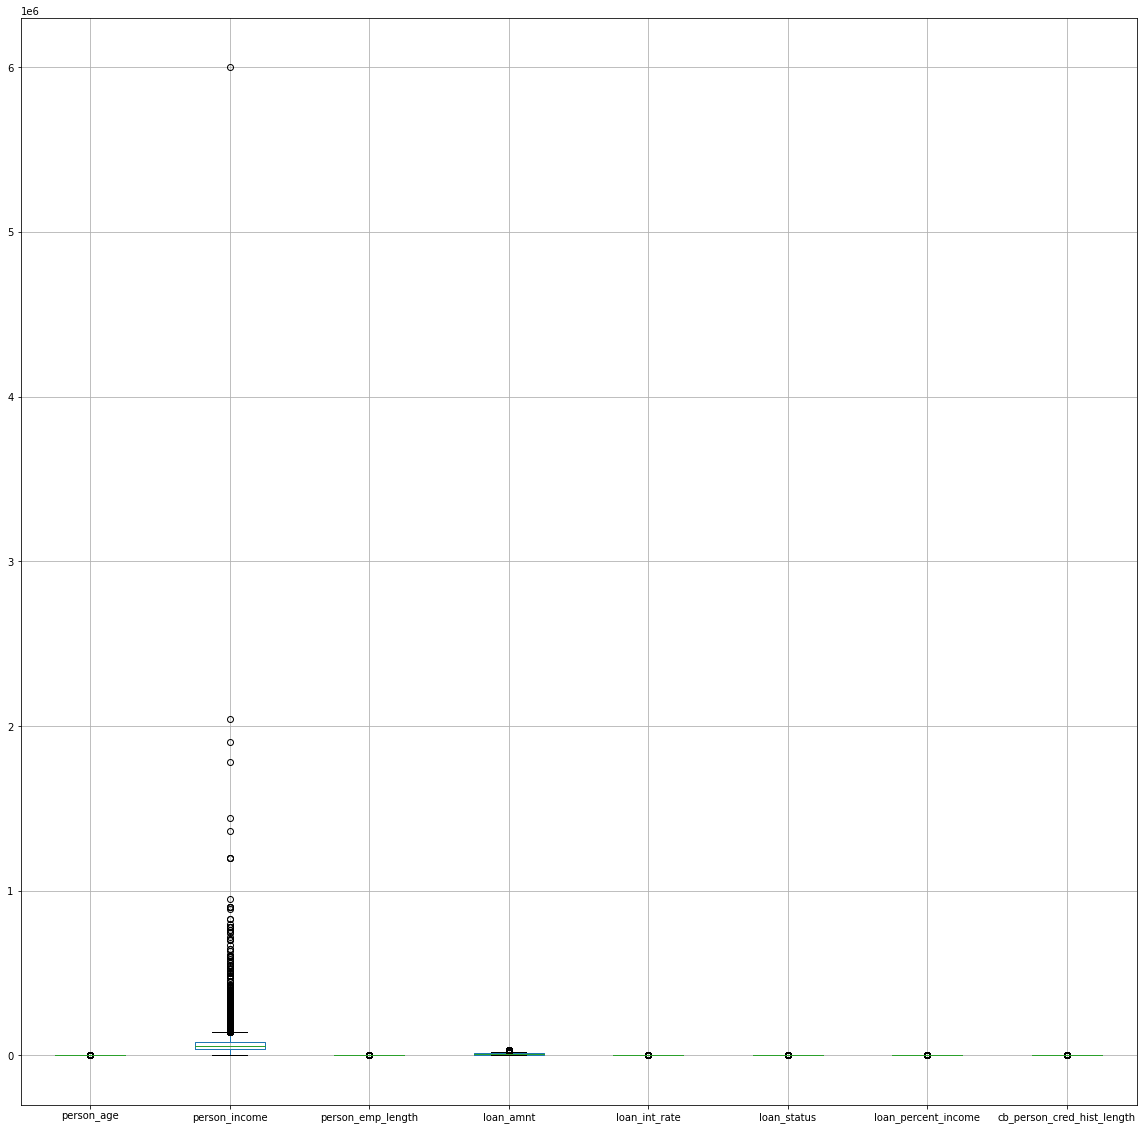

In [ ]:
data.boxplot(numeric_col, figsize=(20,20))

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

<ipython-input-15-75960981860b>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]


ValueError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Daily closing prices", fontsize=18, y=0.95)

# loop through tickers and axes
for ticker, ax in zip(numeric_col, axs.ravel()):
    # filter df for ticker and plot on specified axes
    data[ ticker].boxplot(ax=ax)

    # chart formatting
    ax.set_title(ticker.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")

plt.show()

In [ ]:
## imports
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import pandas as pd
import numpy as np
# plotly setup
plot_rows=6
plot_cols=6
fig = make_subplots(rows=plot_rows, cols=plot_cols)
# add traces
for x in numeric_col:
  for i in range(1, plot_rows + 1):
      for j in range(1, plot_cols + 1):
          #print(str(i)+ ', ' + str(j))
          fig.add_trace(go.Box(y=data.[x],
                                  name = data.[x],
                              ),
                      row=i,
                      col=j)



# Format and show fig
fig.update_layout(height=1200, width=1200)
fig.show()